## Cálculo de distribuciones posteriores

### Primer ejemplo: Distribución Gaussiana

In [1]:
#importar paquetes
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import gamma

In [ ]:
#number of samples 
n_samples = 1000000

# params
# mean prior (normal)
m_0 = 0
sigma2_0 = 1
#variance prior (inverse Gamma)
a_0 = 3
b_0 = 0.5
# sample parameters
m = norm.rvs(m_0,np.sqrt(sigma2_0))
prec = gamma.rvs(a=a_0,scale=1/b_0)
samples = norm.rvs(m,np.sqrt(1/prec),n_samples)

plt.figure(figsize=(18,5))

plt.subplot(131)
mean_axis = np.arange(-5, 5, 0.001)
plt.plot(mean_axis, norm.pdf(mean_axis,m_0,np.sqrt(sigma2_0)),label='prior')
plt.axvline(m,c='r', alpha=0.5,label='sample')
plt.title('prior for mean')
plt.xlim([-5,5])
plt.legend()

plt.subplot(132)
prec_axis = np.arange(0, 20, 0.001)
plt.plot(prec_axis, gamma.pdf(prec_axis,a=a_0,scale=1/b_0),label='prior')
plt.axvline(prec,c='r', alpha=0.5,label='sample')
plt.legend()
plt.title('prior for precision')

plt.subplot(133)
mean_axis = np.arange(-10, 10, 0.001)

plt.plot(mean_axis, norm.pdf(mean_axis,m,np.sqrt(1/prec)),label='conditional')
plt.hist(samples, density=True, bins = 100,  color='r', alpha=0.5,label='histogram')
plt.title(f'Gaussian model (mean:{m:.2f}, var:{1/prec:.2f})')
plt.xlim([-5,5])
plt.legend()

In [ ]:
#updated hypers:
#mean
prec_0 = 1/sigma2_0
m_post_mean = (prec_0*m_0 + prec*np.sum(samples))/(prec_0 + n_samples*prec)
m_post_var = 1/(prec_0 + n_samples*prec)

#prec
prec_post_a = a_0 + n_samples/2
prec_post_b = b_0 + np.sum((samples-m)**2)/2


In [ ]:
plt.figure(figsize=(18,5))

plt.subplot(131)
mean_axis = np.arange(-5, 5, 0.001)
plt.plot(mean_axis, norm.pdf(mean_axis,m_0,np.sqrt(sigma2_0)),label='prior')
plt.plot(mean_axis, norm.pdf(mean_axis,m_post_mean,np.sqrt(m_post_var)),label='posterior')
plt.axvline(m,c='r', alpha=0.5,label='sample')
plt.title('mean posterior')
plt.legend()

plt.subplot(132)
prec_axis = np.arange(0, 20, 0.001)
plt.plot(prec_axis, gamma.pdf(prec_axis,a=a_0,scale=1/b_0),label='prior')
plt.plot(prec_axis, gamma.pdf(prec_axis,a=prec_post_a,scale=1/prec_post_b),label='posterior')
plt.axvline(prec,c='r', alpha=0.5,label='sample')
plt.legend()

plt.title('precision posterior')

plt.subplot(133)
mean_axis = np.arange(-10, 10, 0.001)

plt.plot(mean_axis, norm.pdf(mean_axis,m,np.sqrt(1/prec)),label='model')
plt.hist(samples, density=True, color='r', alpha=0.5,label='histogram')
plt.title(f'Gaussian model (mean:{m:.2f}, var:{1/prec:.2f})')
plt.legend()

### Segundo ejemplo: Modelo multinomial con prior Dirichlet 

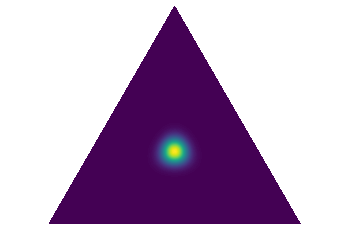

In [26]:
import dirichlet_plots as dp
# evaluar con distintos valores de alpha, e.g. [1,1,1], [10,10,10], [10,2,2]
alpha = [50,50,50]
dp.draw_pdf_contours(dp.Dirichlet(alpha))

Text(0.5, 1.0, 'muestra de distribución Dirichlet')

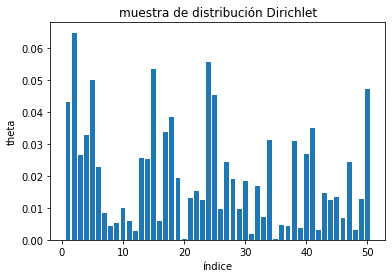

In [117]:
k = 50 #número de clases/eventos/símbolos
#alpha = 10*np.array(np.arange(k)+1) 
alpha = 1*np.ones(k)
theta = np.random.dirichlet(alpha)
plt.bar(np.arange(k)+1, theta);
plt.xlabel('índice')
plt.ylabel('theta')
plt.title('muestra de distribución Dirichlet')
#print(f'alpha = {alpha}');
#print(f'theta = {theta}');

Text(0, 0.5, 'theta')

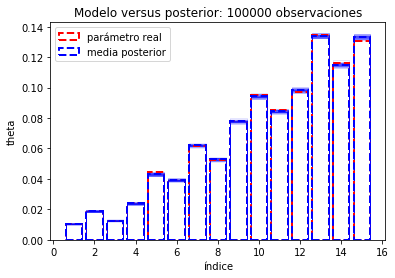

In [80]:
#ahora generar p(x|theta) = multinomial
n = 100000
x = np.random.multinomial(n,theta)
new_alpha = np.ones(k) + x
new_theta = np.random.dirichlet(new_alpha, 100)
plt.figure(figsize=(6,4))
for i in range(50):
    plt.bar(np.arange(k)+1, new_theta[i,:], alpha=0.1, edgecolor='b', color='None');
plt.bar(np.arange(k)+1, theta, lw=2, linestyle ='--', edgecolor='r', color='None', label = 'parámetro real');
plt.bar(np.arange(k)+1, new_alpha/np.sum(new_alpha), lw=2, linestyle ='--', edgecolor='blue', color='None', label = 'media posterior');
plt.legend()
plt.title(f'Modelo versus posterior: {n} observaciones')
plt.xlabel('índice')
plt.ylabel('theta')